# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [8]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


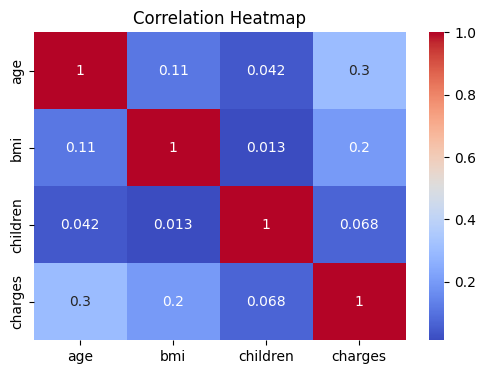

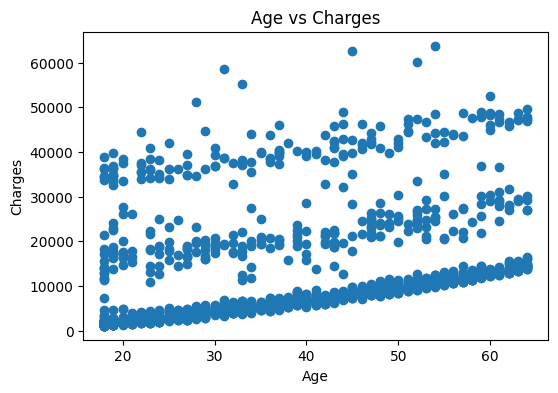

In [ ]:
# TODO: Perform EDA
df.describe()

plt.figure(figsize=(6,4))
data_df = df[['age', 'bmi', 'children', 'charges']]
sns.heatmap(data_df.corr(), annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

x = df['age']
y =df['charges']
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
# TODO: Prepare features
x = df[['age', 'bmi', 'children']]
y = df['charges']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Training Size :" , X_train_scaled.shape[0])
print("Testing Size :" , X_test_scaled.shape[0])

Training Size : 1070
Testing Size : 268


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression
X = df.drop("charges", axis=1)
y = df['charges']

X = pd.get_dummies(X, drop_first=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("RMSE :" ,rmse)
print("MAE :" ,mae)
print("R2 :" ,r2)

RMSE : 5796.284659276273
MAE : 4181.19447375365
R2 : 0.7835929767120724


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression
X = df[['age', 'bmi', 'children']]
y = df['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE :" ,mse)
print("R2 :" ,r2)


poly = PolynomialFeatures(degree=2 ,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test,y_pred_poly)
r2_poly = r2_score(y_test,y_pred_poly)
print("\nMSE Poly :" ,mse_poly)
print("R2 Poly :" ,r2_poly)


comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (deg=2)"],
    "MSE": [mse, mse_poly],
    "R2 Score": [r2, r2_poly]
})

comparison

MSE : 131201335.64669803
R2 : 0.15489592484270776

MSE Poly : 132880932.17923696
R2 Poly : 0.1440771792310701


,Model,MSE,R2 Score
0,Linear Regression,1.312013e+08,0.154896
1,Polynomial Regression (deg=2),1.328809e+08,0.144077


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
# TODO: Support Vector Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVR(kernel='rbf')
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("RMSE :" ,rmse)
print("MAE :" ,mae)
print("R2 :" ,r2)

RMSE : 12889.096314656128
MAE : 8612.408423351833
R2 : -0.07008155372454805


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [ ]:
# TODO: Random Forest Regressor
X = df.drop("charges", axis=1)
y = df["charges"]
cat_cols = ['sex','smoker','region']
num_cols = ['age','bmi','children']
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), cat_cols),
    ("num", "passthrough", num_cols)
])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", rf_model)
])
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 20986611.142178066
RMSE: 4581.114617882647
R2 Score: 0.8648194356210239


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [2]:
# TODO: Load classification dataset
df = pd.read_csv('loan_data.csv')
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


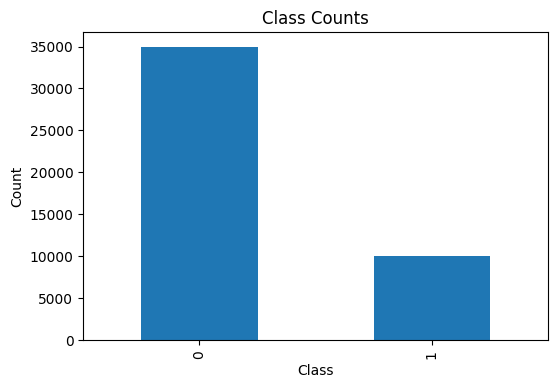

<Figure size 600x400 with 0 Axes>

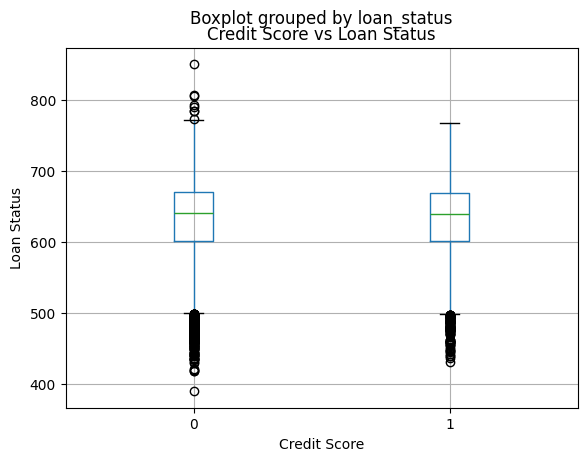

In [3]:
# TODO: Classification EDA
plt.figure(figsize=(6,4))
df['loan_status'].value_counts().plot.bar()
plt.title("Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
df.boxplot(column='credit_score', by='loan_status')
plt.title("Credit Score vs Loan Status")
plt.xlabel("Credit Score")
plt.ylabel("Loan Status")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [4]:
# TODO: Prepare classification features
X = df.drop('loan_status', axis=1)
y = df['loan_status']
categorical_cols = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

numeric_cols = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)
preprocess_and_scale = Pipeline([
    ('preprocessor',preprocessor),
    ('scaler',StandardScaler())
 ])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train_scaled = preprocess_and_scale.fit_transform(X_train)
X_test_scaled = preprocess_and_scale.transform(X_test)

print("Train Size :", X_train_scaled.shape[0])
print("Test Size :", X_test_scaled.shape[0])

Train Size : 36000
Test Size : 9000


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [5]:
# TODO: Logistic Regression
log_reg = LogisticRegression(penalty='l2',max_iter=1000)
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)

cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cm)

Accuracy : 0.8997777777777778
Precision : 0.7895569620253164
Recall : 0.7485
Confusion Matrix :
 [[6601  399]
 [ 503 1497]]


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [6]:
# TODO: SVM Classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled,y_train)

y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ", accuracy)

print("\nClassification Report :")
print(classification_report(y_test,y_pred))

Accuracy :  0.9005555555555556

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7000
           1       0.79      0.75      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.86      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000



## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [7]:
# TODO: Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

Accuracy : 0.753


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


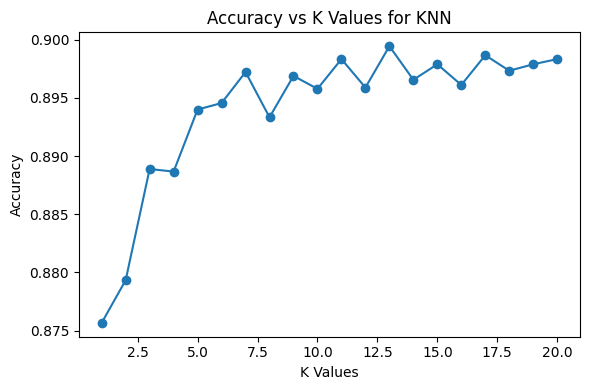

Best K :  13
Best Accuracy :  0.8994444444444445


In [17]:
# TODO: KNN
k_values = range(1,21)
accuracies = []
for k in k_values :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled,y_train)
  y_pred = knn.predict(X_test_scaled)

  accuracy = accuracy_score(y_test,y_pred)
  accuracies.append(accuracy)

plt.figure(figsize=(6,4))
plt.plot(k_values,accuracies,marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Values for KNN")
plt.tight_layout()
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print("Best K : ", best_k)
print("Best Accuracy : " ,max(accuracies))

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


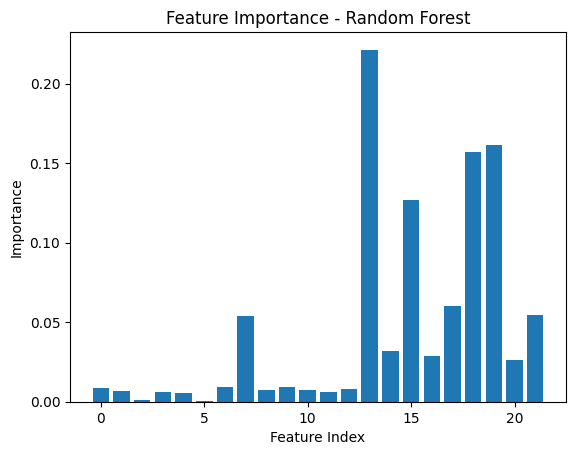

In [18]:
# TODO: Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_

plt.figure()
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
**Random Forest was the best model for both regression and classification because it handles complex patterns well and gives more accurate and stable results than the other models. It achieved better performance scores, making it more reliable for predictions. A real-world use of this model is in a bank loan approval system, where it can help decide whether to approve a loan and estimate financial risk, leading to faster and more accurate decisions.**